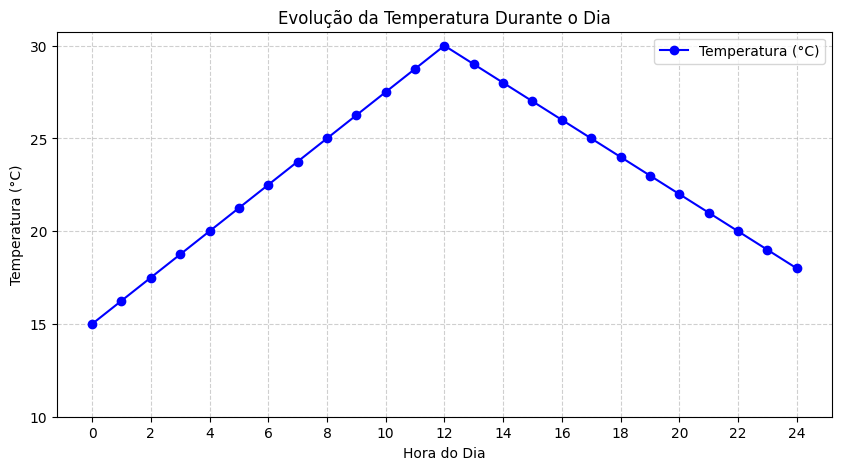

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Criando o DataFrame com os dados meteorológicos
dados = {
    "Data": ["15/01/2025"] * 5,
    "Cidade": ["São Paulo", "Rio de Janeiro", "Curitiba", "Porto Alegre", "Salvador"],
    "Temperatura Máxima (°C)": [30.5, 35.0, 24.0, 28.0, 31.0],
    "Temperatura Mínima (°C)": [22.0, 25.0, 18.0, 20.0, 24.5],
    "Precipitação (mm)": [12.0, np.nan, 8.0, 15.0, np.nan],
    "Umidade Relativa (%)": [78, 70, np.nan, 82, 80]
}

df = pd.DataFrame(dados)

# Substituindo valores ausentes
df["Precipitação (mm)"] = df["Precipitação (mm)"].fillna(df["Precipitação (mm)"].mean())
df["Umidade Relativa (%)"] = df["Umidade Relativa (%)"].fillna(df["Umidade Relativa (%)"].median())

# Adicionando a coluna Amplitude Térmica
df["Amplitude Térmica"] = df["Temperatura Máxima (°C)"] - df["Temperatura Mínima (°C)"]

# Criando um novo DataFrame com cidades cuja Temperatura Máxima é superior a 30°C
df_temp_alta = df[df["Temperatura Máxima (°C)"] > 30]

# Reordenando as colunas do DataFrame
colunas_ordenadas = ["Data", "Cidade", "Temperatura Máxima (°C)", "Temperatura Mínima (°C)",
                      "Amplitude Térmica", "Precipitação (mm)", "Umidade Relativa (%)"]
df = df[colunas_ordenadas]

# Criando os dados do gráfico de temperatura ao longo do dia
horas = list(range(25))
temperaturas = [15 + (15/12)*h if h <= 12 else 30 - (12/12)*(h-12) for h in horas]

# Gerando o gráfico
plt.figure(figsize=(10, 5))
plt.plot(horas, temperaturas, marker='o', linestyle='-', color='b', label="Temperatura (°C)")

# Personalizando o gráfico
plt.title("Evolução da Temperatura Durante o Dia")
plt.xlabel("Hora do Dia")
plt.ylabel("Temperatura (°C)")
plt.xticks(range(0, 25, 2))  # Marcação de 2 em 2 horas
plt.yticks(range(10, 35, 5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()